# Carbon-13 NMR Spectroscopy Analysis

## Understanding $^{13}C$-NMR Spectroscopy

### Chemical Shift in Carbon-13 NMR
- **$^{13}C$-NMR** provides information about the **carbon framework** of a molecule.
- Carbon chemical shifts span a **much wider range** (0-220 ppm) compared to proton NMR (0-12 ppm).
- **Electronegative atoms** and **hybridization** strongly affect carbon chemical shifts:
  - **sp³ carbons (alkanes)**: 0-50 ppm
  - **sp² carbons (alkenes, aromatics)**: 100-150 ppm
  - **Carbonyl carbons (C=O)**: 160-220 ppm

### Key Differences from $^{1}H$-NMR
- **Lower natural abundance**: Only ~1.1% of carbon is $^{13}C$ (vs. 99.98% for $^{1}H$)
- **Broader chemical shift range**: 0-220 ppm (vs. 0-12 ppm for protons)
- **No coupling between carbons**: $^{13}C$-$^{13}C$ coupling is rare due to low abundance
- **Proton decoupling**: Usually run decoupled to simplify spectra (one peak per unique carbon)

### Chemical Shift Formula
$$
\delta = \frac{\nu_{\text{sample}} - \nu_{\text{reference}}}{\nu_{\text{reference}}} \times 10^6
$$

where the reference is typically **TMS (tetramethylsilane)** at 0 ppm.

## Carbon-13 Chemical Shift Ranges

The following ranges help identify different types of carbon environments:

| Carbon Type | Chemical Shift (ppm) | Examples |
|-------------|---------------------|----------|
| Alkyl (sp³ C-H) | 0-50 | CH₃, CH₂, CH |
| C-O, C-N (sp³) | 50-90 | Alcohols, ethers, amines |
| Alkyne (sp C) | 65-85 | C≡C |
| Alkene (sp² C=C) | 100-150 | C=C |
| Aromatic (sp²) | 110-160 | Benzene rings |
| Carbonyl (C=O) | 160-220 | Ketones, aldehydes, esters, acids |

# Setup and Import Libraries

Import necessary libraries and functions for Carbon-13 NMR analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from importlib import reload

# Make the project root importable and import your module
from pathlib import Path
import sys
project_root = Path.cwd().parent  # ...\NMR-Project
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from functions import nmr_function as nmr
print("Imported nmr from:", nmr.__file__)

Imported nmr from: c:\Users\Windows User\NMR-Project\functions\nmr_function.py


# Define Carbon-13 Chemical Shift Ranges

Define the PPM shift correlations specific to Carbon-13 NMR. These ranges are significantly different from proton NMR and span 0-220 ppm.

In [2]:
# Carbon-13 specific PPM shift ranges (updated for better peak identification)
# Note: TMS (tetramethylsilane) is the reference at 0 ppm, but may appear from -0.5 to +0.5
C13_PPM_SHIFTS = {
    "TMS Reference (CH₃)₄Si": "0-2ppm",  # TMS reference region
    "Alkyl (sp³ CH3/CH2/CH)": "5-50ppm",
    "Quaternary C (R₄C)": "30-50ppm",
    "C-Halogen (C-Cl, C-Br)": "30-80ppm",
    "C-O, C-N (alcohols, ethers, amines)": "50-90ppm",
    "Alkyne (sp C≡C)": "65-85ppm",
    "Alkene (sp² C=C)": "100-150ppm",
    "Aromatic (sp² Ar-C)": "110-160ppm",
    "Nitrile (C≡N)": "115-125ppm",
    "Carbonyl Ester/Amide (C=O)": "160-180ppm",
    "Carbonyl Ketone/Aldehyde (C=O)": "180-215ppm",
    "Carboxylic Acid (COOH)": "170-185ppm"
}

print("Carbon-13 Chemical Shift Ranges:")

for group, ppm_range in C13_PPM_SHIFTS.items():    print(f"  {group}: {ppm_range}")

Carbon-13 Chemical Shift Ranges:
  TMS Reference (CH₃)₄Si: 0-2ppm
  Alkyl (sp³ CH3/CH2/CH): 5-50ppm
  Quaternary C (R₄C): 30-50ppm
  C-Halogen (C-Cl, C-Br): 30-80ppm
  C-O, C-N (alcohols, ethers, amines): 50-90ppm
  Alkyne (sp C≡C): 65-85ppm
  Alkene (sp² C=C): 100-150ppm
  Aromatic (sp² Ar-C): 110-160ppm
  Nitrile (C≡N): 115-125ppm
  Carbonyl Ester/Amide (C=O): 160-180ppm
  Carbonyl Ketone/Aldehyde (C=O): 180-215ppm
  Carboxylic Acid (COOH): 170-185ppm


# Load Carbon-13 FID Data

Load the Free Induction Decay (FID) data for a Carbon-13 NMR experiment. We'll use one of the available carbon FID files from the data directory.

In [3]:
reload(nmr)

# Load Carbon-13 FID data
# Using local file path (data folder exists locally but not in GitHub repo yet)
# Option 1: 18_03_30_dextacet_13C_FID.asc
# Option 2: 18_05_18_dextraacet_13C.1.asc
# Option 3: krishna_data/25_11_26_ValerianFrac2_13C_FID.asc

local_path = r"data/correctly_processed_fid/18_03_30_dextacet_13C_FID.asc"
df, name = nmr.load_fid_and_preview(local_path)

# Ensure array for downstream cells
data = df if isinstance(df, np.ndarray) else df.to_numpy()
print(f"\nLoaded: {name}")
print(f"Data shape: {data.shape}")

          X          Real     Imaginary
0  0.000000  7.780900e-10 -3.371710e-09
1  0.000032  1.278344e-04  1.835575e-04
2  0.000064  4.036882e-03 -4.395042e-03
3  0.000096  4.171608e-02 -5.820043e-04
4  0.000127  3.018214e-03  1.324561e-02

Loaded: 18_03_30_dextacet_13C_FID
Data shape: (32768, 3)


# Plot Free Induction Decay (FID)

Visualize the time-domain FID signal before Fourier transformation. The FID represents the raw NMR signal decay over time.

# 🧠 Apply Deep Learning Denoising (Optional)

Apply the trained deep learning model to enhance the FID signal before analysis.

In [4]:
# SET THIS FLAG TO ENABLE/DISABLE DENOISING
USE_DENOISING = True  # Set to False to skip denoising

if USE_DENOISING:
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    
    # Define the denoiser architecture
    class DilatedResBlock(nn.Module):
        def __init__(self, channels: int, dilation: int = 1, k: int = 11):
            super().__init__()
            pad = dilation * ((k - 1) // 2)
            self.conv1 = nn.Conv1d(channels, channels, k, padding=pad, dilation=dilation)
            self.conv2 = nn.Conv1d(channels, channels, k, padding=pad, dilation=dilation)
        def forward(self, x):
            h = F.relu(self.conv1(x))
            h = self.conv2(h)
            return F.relu(x + h)
    
    class DenoiseNetPhysics(nn.Module):
        def __init__(self, in_ch=2, hidden=64, k=11, dilations=(1,2,4,8,16,32)):
            super().__init__()
            self.inp = nn.Conv1d(in_ch, hidden, k, padding=(k-1)//2)
            self.blocks = nn.Sequential(*[DilatedResBlock(hidden, d, k) for d in dilations])
            self.out = nn.Conv1d(hidden, in_ch, k, padding=(k-1)//2)
        def forward(self, x):
            h = F.relu(self.inp(x))
            h = self.blocks(h)
            return x + self.out(h)
    
    # Load model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    denoiser_model = DenoiseNetPhysics().to(device)
    
    # Try loading checkpoint
    checkpoint_dir = Path("checkpoints")
    best_models = ["DenoiseNetPhysics_final_best.pth", "DenoiseNetPhysics_aggressive_best.pth",
                   "DenoiseNetPhysics_extended_best.pth", "DenoiseNetPhysics_finetuned_best.pth"]
    
    loaded = False
    for ckpt_name in best_models:
        ckpt_path = checkpoint_dir / ckpt_name
        if ckpt_path.exists():
            try:
                ckpt = torch.load(ckpt_path, map_location=device, weights_only=False)
                denoiser_model.load_state_dict(ckpt['model_state'] if 'model_state' in ckpt else ckpt)
                print(f"✅ Loaded: {ckpt_name}")
                loaded = True
                break
            except: continue
    
    if loaded:
        denoiser_model.eval()
        # Apply denoising
        data_original = data.copy()
        real_part, imag_part = data[:, 1].astype(np.float32), data[:, 2].astype(np.float32)
        sig = np.stack([real_part, imag_part])
        
        # Normalize
        L = sig.shape[1]
        late = slice(int(0.8*L), L)
        baseline = np.median(sig[:, late], axis=1, keepdims=True)
        sig_norm = sig - baseline
        
        # Denoise
        with torch.no_grad():
            x = torch.from_numpy(sig_norm).unsqueeze(0).to(device)
            y = denoiser_model(x).cpu().squeeze(0).numpy()
        
        # Update data
        data[:, 1] = (y[0] + baseline[0, 0])
        data[:, 2] = (y[1] + baseline[1, 0])
        
        # Calculate SNR
        def calc_snr(d):
            env = np.sqrt(d[:,1]**2 + d[:,2]**2)
            s = int(0.2*len(env))
            return 20*np.log10(np.sqrt(np.mean(env[:s]**2)) / (np.sqrt(np.mean(env[-s:]**2))+1e-12))
        
        snr_before, snr_after = calc_snr(data_original), calc_snr(data)
        snr_improvement = snr_after - snr_before
        print(f"   SNR: {snr_before:.1f} → {snr_after:.1f} dB ({snr_improvement:+.1f} dB)")
        print("✅ Using DENOISED data for analysis")
    else:
        print("⚠️  No model loaded - using original data")
        USE_DENOISING = False
else:
    print("Denoising disabled - using original FID")

✅ Loaded: DenoiseNetPhysics_final_best.pth
   SNR: 15.7 → 16.1 dB (+0.4 dB)
✅ Using DENOISED data for analysis


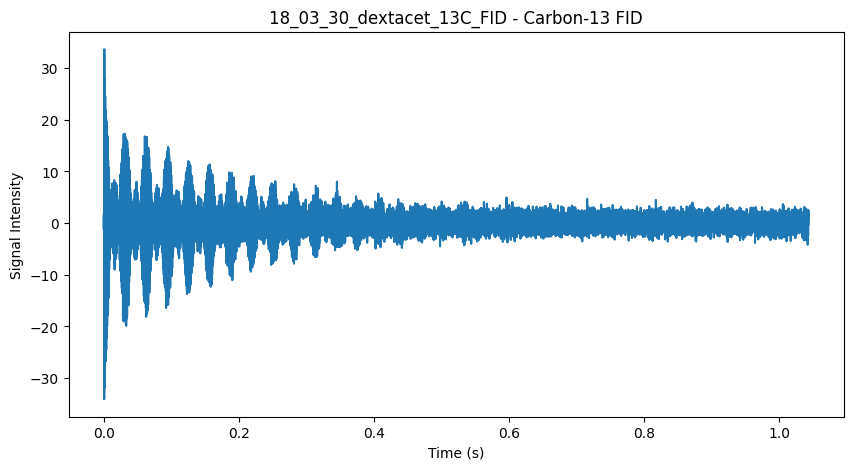

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': '18_03_30_dextacet_13C_FID - Carbon-13 FID'}, xlabel='Time (s)', ylabel='Signal Intensity'>)

In [5]:
nmr.plot_fid(data, title=f"{name} - Carbon-13 FID", xcol=0, ycol=1, 
             xlabel="Time (s)", ylabel="Signal Intensity", invert_x=False)

# 📊 Optional: Apply Gaussian Smoothing to Spectrum

For Carbon-13 NMR, you can optionally apply additional Gaussian smoothing to the spectrum after FFT. This can help:
- **Reduce high-frequency noise** that may remain after deep learning denoising
- **Smooth out minor artifacts** from FFT processing
- **Improve visual clarity** for peak identification

**Note:** Gaussian filtering is applied in the **frequency domain** (after FFT), while the deep learning denoiser works in the **time domain** (before FFT). They are complementary techniques.

**Recommendation for Carbon-13:**
- If deep learning denoising gives good SNR improvement (+2 dB or more): **Skip Gaussian filtering** to preserve peak shape
- If SNR improvement is modest (<+2 dB) or no denoising used: **Use Gaussian filtering** with sigma=1-3

In [6]:
# AUTO-ENABLE GAUSSIAN SMOOTHING IF DENOISING IMPROVEMENT IS LOW
# Check if SNR improvement from denoising was modest
if 'snr_improvement' in locals() and snr_improvement < 2.0:
    USE_GAUSSIAN_SMOOTHING = True
    print(f"⚠️  SNR improvement was only {snr_improvement:+.1f} dB (< +2 dB)")
    print("   Auto-enabling Gaussian smoothing for additional noise reduction")
else:
    USE_GAUSSIAN_SMOOTHING = False  # Set to True to manually enable

GAUSSIAN_SIGMA = 2.0  # Smoothing strength (1-3 recommended for C-13)

print(f"\nGaussian smoothing: {'ENABLED' if USE_GAUSSIAN_SMOOTHING else 'DISABLED'}")
if USE_GAUSSIAN_SMOOTHING:
    print(f"  Sigma value: {GAUSSIAN_SIGMA}")
    print("  Note: This will be applied after FFT, before peak detection")
else:
    print("  Relying on deep learning denoising only for noise reduction")

⚠️  SNR improvement was only +0.4 dB (< +2 dB)
   Auto-enabling Gaussian smoothing for additional noise reduction

Gaussian smoothing: ENABLED
  Sigma value: 2.0
  Note: This will be applied after FFT, before peak detection


# Fourier Transform and Spectrum Analysis

Apply the Fast Fourier Transform (FFT) to convert the time-domain FID into a frequency-domain spectrum.

**Note on DFT vs FFT:** 
- NMR data consists of **discrete** time-domain points, so mathematically we compute a **Discrete Fourier Transform (DFT)**
- **FFT (Fast Fourier Transform)** is an efficient algorithm to compute the DFT (O(N log N) instead of O(N²))
- In practice, all NMR software uses FFT for speed, but it computes the same result as DFT
- The terms are often used interchangeably in NMR literature

## Carbon-13 Spectrometer Frequency
Typical $^{13}C$ spectrometer frequencies are around **100 MHz** (at a field where $^{1}H$ resonates at 400 MHz).

The frequency relationship uses gyromagnetic ratios:
$$\nu_{^{13}C} = \frac{\gamma_{^{13}C}}{\gamma_{^{1}H}} \times \nu_{^{1}H} = \frac{10.71 \text{ MHz/T}}{42.58 \text{ MHz/T}} \times \nu_{^{1}H} \approx 0.2514 \times \nu_{^{1}H}$$

For a 399.78 MHz (proton) instrument, the carbon frequency is **100.52 MHz**.

In [7]:
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# Carbon-13 spectrometer frequency (MHz) - calculated from proton frequency
# User's instrument: 399.78 MHz (¹H) → ¹³C frequency calculation:
#   γ(¹³C) = 10.71 MHz/T, γ(¹H) = 42.58 MHz/T
#   Ratio: γ(¹³C)/γ(¹H) = 10.71/42.58 = 0.25145020
#   Therefore: 399.78 MHz × 0.25145 = 100.52 MHz (¹³C)
C13_SPECTROMETER_FREQ = 100.52849  # MHz (calculated for 399.78 MHz ¹H instrument)

# Compute FFT spectrum
fft_res = nmr.compute_fft_spectrum(data, window='exp')  
frequencies = fft_res["frequencies"]
magnitude = fft_res["magnitude"]

# Use only positive frequencies (like hydrogen NMR)
positive_frequencies = fft_res["positive_frequencies"]
positive_magnitude = fft_res["positive_magnitude"]

# Apply optional Gaussian smoothing to spectrum (frequency domain)
if USE_GAUSSIAN_SMOOTHING:
    positive_magnitude_original = positive_magnitude.copy()
    positive_magnitude = gaussian_filter1d(positive_magnitude, sigma=GAUSSIAN_SIGMA)
    print(f"✅ Applied Gaussian smoothing (σ={GAUSSIAN_SIGMA}) to spectrum")
else:
    print("No Gaussian smoothing applied to spectrum")

# Build ppm axis for Carbon-13 (positive frequencies only)
ppm_axis = positive_frequencies / C13_SPECTROMETER_FREQ

print(f"Spectrometer frequency: {C13_SPECTROMETER_FREQ} MHz")
print(f"Frequency range: {positive_frequencies.min():.2f} to {positive_frequencies.max():.2f} Hz")
print(f"PPM range: {ppm_axis.min():.2f} to {ppm_axis.max():.2f} ppm")

✅ Applied Gaussian smoothing (σ=2.0) to spectrum
Spectrometer frequency: 100.52849 MHz
Frequency range: 0.00 to 15702.56 Hz
PPM range: 0.00 to 156.20 ppm


# Peak Detection with Carbon-13 Specific Thresholds

Carbon-13 NMR peaks are typically:
- **Weaker** than proton NMR (due to lower natural abundance)
- **Sharper** when proton-decoupled
- **More widely spaced** (larger ppm range)

We'll use adjusted thresholds for peak detection suitable for Carbon-13 spectra.

Peak Detection Parameters:
  Height threshold: 3.0% of max intensity
  Prominence threshold: 2.50% of max intensity
  Min distance: 10.0 Hz
\n📍 Note: Lowered thresholds to detect weaker peaks (e.g., near δ ~0 ppm)
Zoom window from detected peaks: 0.22–45.91 ppm


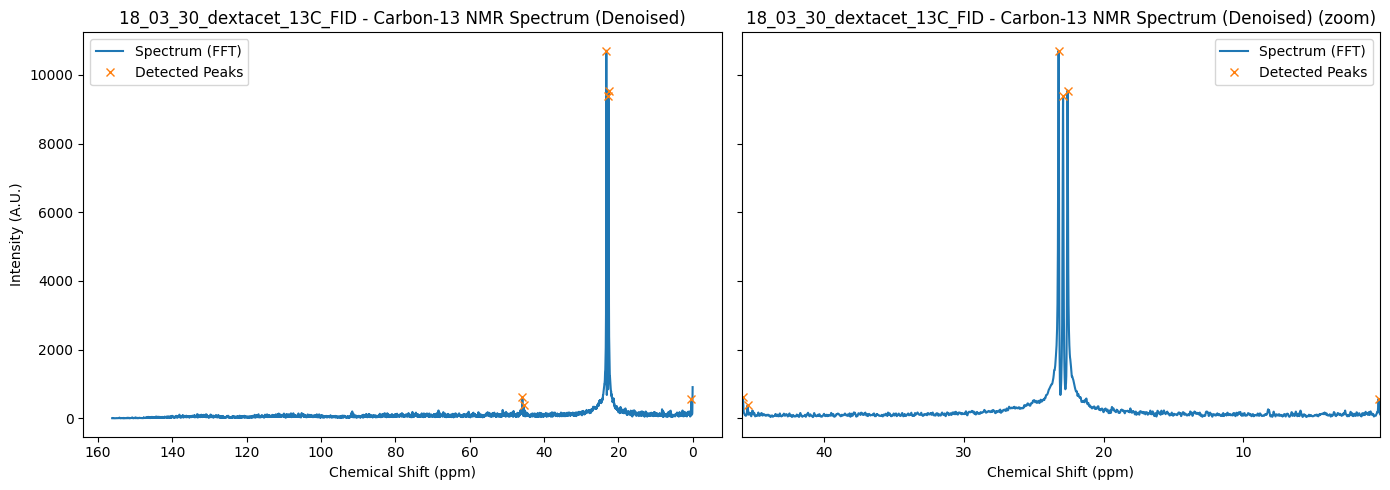


Detected 6 peaks in the spectrum
Peak positions (ppm): ['0.32', '22.58', '22.90', '23.23', '45.48', '45.81']
✅ Peak(s) detected in TMS/low-field region (δ < 2 ppm)


In [9]:
def plot_full_carbon_and_zoom_with_peaks(
    frequencies,
    magnitudes,
    title,
    spectrometer_freq=399.78219838,
    ppm_range=None,
    identify_functional_groups=None,
    ppm_shifts=None,
    identified_groups=None,
    min_distance_hz=7.0,
    height_frac=0.10,
    prominence_frac=0.05,
    ax_full=None,
    ax_zoom=None,
    show=True
):
    # Rename parameters to internal variables
    freqs = frequencies
    mags = magnitudes
    
    # Determine if full spectrum (has negatives) or only positive
    is_full = (freqs.min() < 0) and (freqs.max() > 0)

    if is_full:
        freqs_shifted = fftshift(freqs)
        mags_shifted = fftshift(mags)
    else:
        freqs_shifted = freqs
        mags_shifted = mags

    # ...existing code...

    # Compute ppm axis
    ppm_axis = freqs_shifted / spectrometer_freq

    # Infer ppm_range (do NOT clamp for 13C; caller can pass explicit range)
    if ppm_range is None:
        ppm_range = float(ppm_axis.max() - ppm_axis.min())

    # Peak detection thresholds
    max_int = float(mags_shifted.max())
    if max_int == 0:
        print("All-zero intensity.")
        return {}

    height = height_frac * max_int
    prominence = prominence_frac * max_int

    n_points = len(mags_shifted)
    # Use actual frequency span (Hz) to compute Hz-per-point robustly
    hz_span = float(freqs_shifted.max() - freqs_shifted.min()) if n_points > 1 else spectrometer_freq
    hz_per_point = hz_span / max(1, (n_points - 1))
    min_distance_pts = max(1, int(min_distance_hz / max(hz_per_point, 1e-9)))

    from scipy.signal import find_peaks
    peaks, properties = find_peaks(
        mags_shifted,
        height=height,
        distance=min_distance_pts,
        prominence=prominence
    )

    # Functional group identification (expects ppm positions, not frequencies)
    if identified_groups is None and callable(identify_functional_groups) and ppm_shifts is not None:
        # Convert to ppm positions for identification
        # Re-run identification on ppm positions at detected peaks
        try:
            identified_groups = identify_functional_groups(ppm_axis, mags_shifted, ppm_shifts)
        except Exception:
            identified_groups = []
    identified_groups = identified_groups or []

    # Build zoom window:
    # Prefer detected peaks; if absent, fall back to identified_groups.
    buffer_ppm = 0.10
    zoom_x_min, zoom_x_max = None, None
    if peaks.size:
        peak_ppms = ppm_axis[peaks]
        zoom_x_min = float(peak_ppms.min() - buffer_ppm)
        zoom_x_max = float(peak_ppms.max() + buffer_ppm)
        print(f"Zoom window from detected peaks: {zoom_x_min:.2f}–{zoom_x_max:.2f} ppm")
    elif identified_groups:
        group_ppms = [p for p, _ in identified_groups]
        zoom_x_min = float(min(group_ppms) - buffer_ppm)
        zoom_x_max = float(max(group_ppms) + buffer_ppm)
        print(f"Zoom window from functional groups: {zoom_x_min:.2f}–{zoom_x_max:.2f} ppm")
    else:
        # Default to whole ppm axis
        zoom_x_min = float(ppm_axis.min())
        zoom_x_max = float(ppm_axis.max())
        print("No peaks/groups detected; zoom window = full ppm axis.")

    created_fig = False
    if ax_full is None or ax_zoom is None:
        fig, (ax_full, ax_zoom) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
        created_fig = True
    else:
        fig = ax_full.figure

    # Full plot (entire spectrum, like H-NMR cell 25)
    ax_full.plot(ppm_axis, mags_shifted, label="Spectrum (FFT)")
    if peaks.size:
        ax_full.plot(ppm_axis[peaks], mags_shifted[peaks], "x", label="Detected Peaks")
    ax_full.invert_xaxis()
    ax_full.set_xlabel("Chemical Shift (ppm)")
    ax_full.set_ylabel("Intensity (A.U.)")
    ax_full.set_title(title)
    ax_full.legend()

    # Zoom plot
    ax_zoom.plot(ppm_axis, mags_shifted, label="Spectrum (FFT)")
    if peaks.size:
        ax_zoom.plot(ppm_axis[peaks], mags_shifted[peaks], "x", label="Detected Peaks")
    ax_zoom.invert_xaxis()
    ax_zoom.set_xlim(zoom_x_max, zoom_x_min)  # show all detected peaks
    ax_zoom.set_xlabel("Chemical Shift (ppm)")
    ax_zoom.set_title(f"{title} (zoom)")
    ax_zoom.legend()

    if show and created_fig:
        plt.tight_layout()
        plt.show()

    return {
        "fig": fig,
        "axes": (ax_full, ax_zoom),
        "ppm_axis": ppm_axis,
        "intensity": mags_shifted,
        "peaks": peaks,
        "properties": properties,
        "identified_groups": identified_groups,
    }


# Carbon-13 specific peak detection parameters
# Adjusted to detect peaks including weak ones near 0 ppm (e.g., TMS region)
C13_HEIGHT_FRAC = 0.03      # Lower threshold to catch weaker peaks (was 0.05)
C13_PROMINENCE_FRAC = 0.025 # Lower prominence to detect smaller peaks (was 0.04)
C13_MIN_DISTANCE_HZ = 10.0  # Minimum distance between peaks (vs 7.0 for H-NMR)

print("Peak Detection Parameters:")
print(f"  Height threshold: {C13_HEIGHT_FRAC*100:.1f}% of max intensity")
print(f"  Prominence threshold: {C13_PROMINENCE_FRAC*100:.2f}% of max intensity")
print(f"  Min distance: {C13_MIN_DISTANCE_HZ} Hz")
print("\\n📍 Note: Lowered thresholds to detect weaker peaks (e.g., near δ ~0 ppm)")

# Peak detection using positive frequencies only
res = plot_full_carbon_and_zoom_with_peaks(
    positive_frequencies, 
    positive_magnitude,
    title=f"{name} - Carbon-13 NMR Spectrum{' (Denoised)' if USE_DENOISING else ''}",
    spectrometer_freq=C13_SPECTROMETER_FREQ,
    ppm_range=220,  # Carbon-13 typically spans 0-220 ppm
    identify_functional_groups=nmr.identify_functional_groups,
    ppm_shifts=C13_PPM_SHIFTS,
    min_distance_hz=C13_MIN_DISTANCE_HZ,
    height_frac=C13_HEIGHT_FRAC,
    prominence_frac=C13_PROMINENCE_FRAC,
    show=True
)

identified_groups = res.get("identified_groups", [])
peaks = res.get("peaks", np.array([]))
ppm_axis_res = res.get("ppm_axis", ppm_axis)
intensity = res.get("intensity", positive_magnitude)

print(f"\nDetected {len(peaks)} peaks in the spectrum")
if len(peaks) > 0:
    peak_ppms_list = [ppm_axis_res[p] for p in peaks]
    print(f"Peak positions (ppm): {[f'{p:.2f}' for p in peak_ppms_list]}")
    if any(p < 2.0 for p in peak_ppms_list):
        print("✅ Peak(s) detected in TMS/low-field region (δ < 2 ppm)")

# Full Carbon-13 Spectrum Overview

The peak detection cell above (Cell 18) already displays a full spectrum with zoom. Cell 21 below provides an additional full-spectrum view with all detected peaks marked.

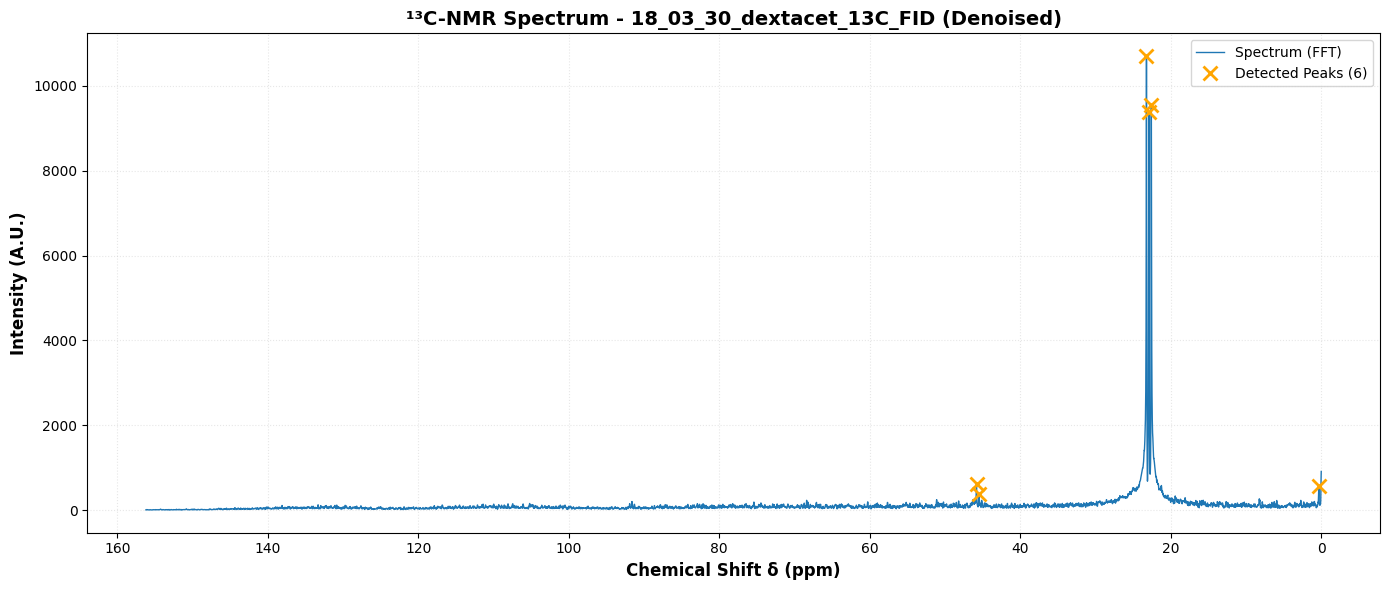


Full spectrum displayed with 6 detected peaks
Chemical shift range: 0.0 to 156.2 ppm


In [10]:
# Plot full spectrum with detected peaks
plt.figure(figsize=(14, 6))

# Use the variables from peak detection (Cell 18)
if 'ppm_axis_res' in locals() and 'intensity' in locals():
    plt_ppm = ppm_axis_res
    plt_int = intensity
else:
    plt_ppm = ppm_axis
    plt_int = positive_magnitude

plt.plot(plt_ppm, plt_int, linewidth=1, color='#1f77b4', label="Spectrum (FFT)")

# Mark detected peaks
if 'peaks' in locals() and len(peaks) > 0:
    peak_ppms_full = plt_ppm[peaks]
    peak_heights = plt_int[peaks]
    plt.plot(peak_ppms_full, peak_heights, "x", markersize=10, color='orange', 
             label=f"Detected Peaks ({len(peaks)})", markeredgewidth=2)

plt.gca().invert_xaxis()
plt.xlabel("Chemical Shift δ (ppm)", fontsize=12, fontweight='bold')
plt.ylabel("Intensity (A.U.)", fontsize=12, fontweight='bold')
plt.title(f"¹³C-NMR Spectrum - {name}{' (Denoised)' if USE_DENOISING else ''}", 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3, linestyle=':')
plt.tight_layout()
plt.show()

if 'peaks' in locals():
    print(f"\nFull spectrum displayed with {len(peaks)} detected peaks")
    print(f"Chemical shift range: {plt_ppm.min():.1f} to {plt_ppm.max():.1f} ppm")
else:
    print("\n⚠️  No peaks detected. Run Cell 18 (Peak Detection) first.")

Creating zoomed plots around each peak (±1.0 ppm)


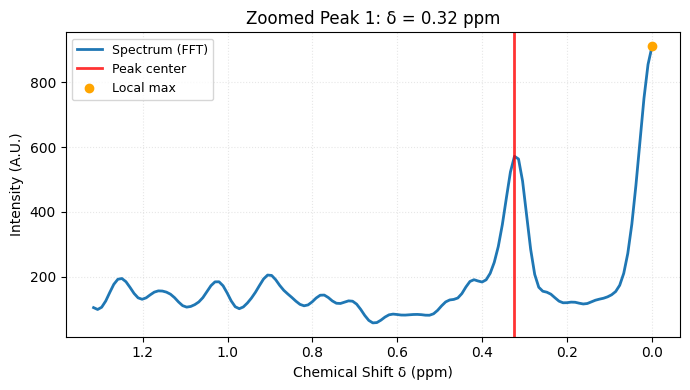

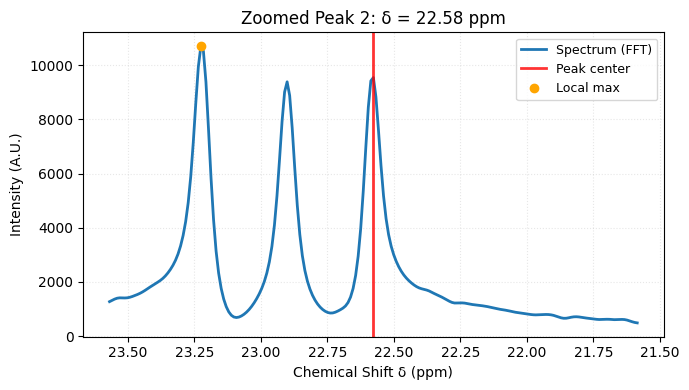

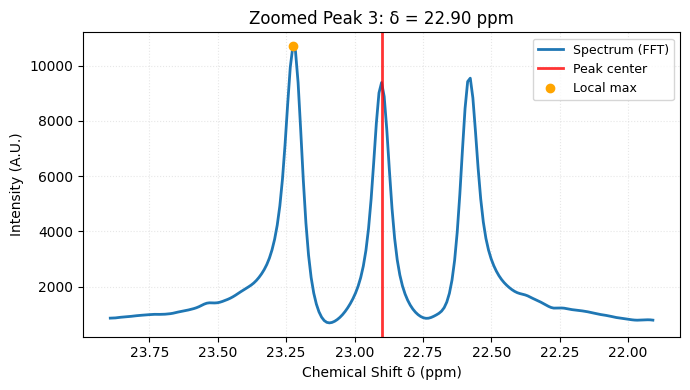

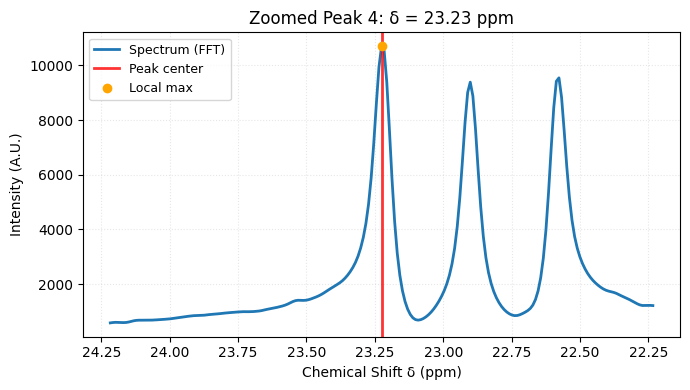

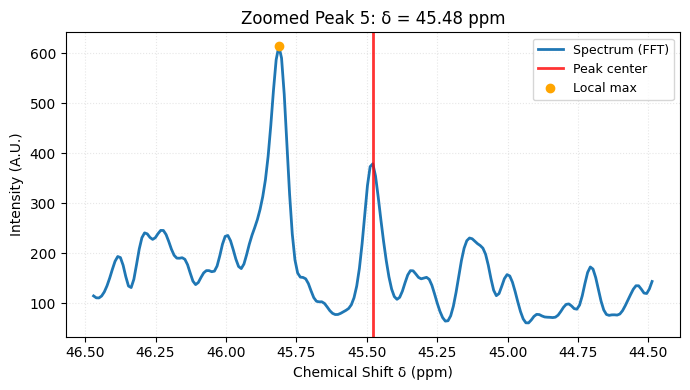

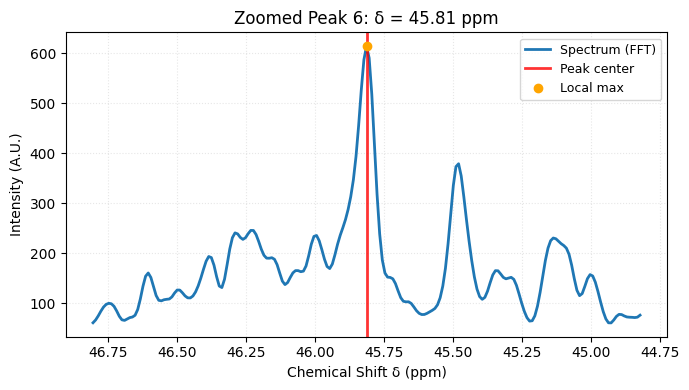

In [14]:
# ...existing code...
# New cell: Individual zoomed-in plots for each detected peak (place after Cell 20)

# Ensure required variables exist
if 'peaks' not in locals() or len(peaks) == 0:
    print("⚠️ No peaks found. Run Cell 18 (Peak Detection) first.")
else:
    # Use resolved ppm axis and intensity from peak detection
    plt_ppm = ppm_axis_res if 'ppm_axis_res' in locals() else ppm_axis
    plt_int = intensity if 'intensity' in locals() else positive_magnitude

    # Zoom window size around each peak (±window_ppm)
    window_ppm = 1.0  # adjust if needed (e.g., 0.5–2.0 for 13C)
    print(f"Creating zoomed plots around each peak (±{window_ppm} ppm)")

    for i, peak_idx in enumerate(peaks, start=1):
        center_ppm = float(plt_ppm[peak_idx])

        # Build mask for zoom region
        left_ppm = center_ppm - window_ppm
        right_ppm = center_ppm + window_ppm
        mask = (plt_ppm >= left_ppm) & (plt_ppm <= right_ppm)

        # Skip if region too small
        if mask.sum() < 5:
            print(f"Skipping peak {i} at δ {center_ppm:.2f} ppm (too few points in window)")
            continue

        # Plot individual figure per peak
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.plot(plt_ppm[mask], plt_int[mask], color='#1f77b4', lw=2, label='Spectrum (FFT)')
        ax.axvline(center_ppm, color='red', lw=2, alpha=0.8, label='Peak center')

        # Mark local max in the window for clarity
        local_idx = np.argmax(plt_int[mask])
        local_ppm = plt_ppm[mask][local_idx]
        local_val = plt_int[mask][local_idx]
        ax.plot(local_ppm, local_val, 'o', color='orange', label='Local max')

        ax.invert_xaxis()
        ax.set_xlabel("Chemical Shift δ (ppm)")
        ax.set_ylabel("Intensity (A.U.)")
        ax.set_title(f"Zoomed Peak {i}: δ = {center_ppm:.2f} ppm")
        ax.grid(alpha=0.3, linestyle=':')
        ax.legend(fontsize=9)
        plt.tight_layout()
        plt.show()

# Zoomed Spectrum with Peak Detection

Now we'll zoom into the relevant regions and identify functional groups.

# Identified Functional Groups

Display the carbon types identified based on their chemical shifts.

Identified Carbon Functional Groups:


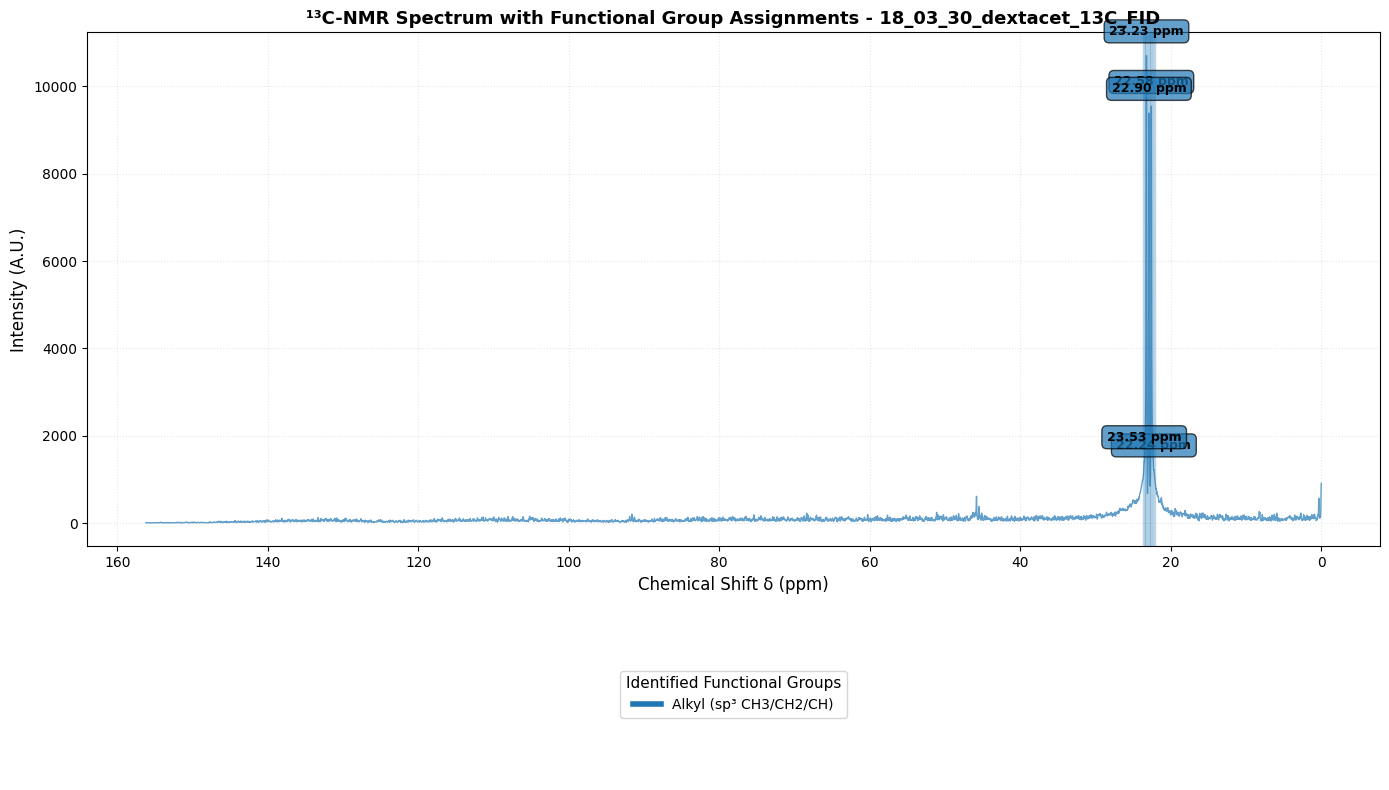


Text Summary:
  δ 22.24 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 22.58 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 22.90 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 23.23 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 23.53 ppm → Alkyl (sp³ CH3/CH2/CH)


In [11]:
# Visualize identified functional groups
print("Identified Carbon Functional Groups:")
print("=" * 60)

if identified_groups:
    # Create a bar chart showing peak positions colored by functional group
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [3, 1]})
    
    # Top plot: Full spectrum with annotations
    ax1.plot(ppm_axis_res, intensity, linewidth=1, color='#1f77b4', alpha=0.7)
    
    # Color map for functional groups
    unique_groups = list(set(g for _, g in identified_groups))
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_groups)))
    group_colors = {group: colors[i] for i, group in enumerate(unique_groups)}
    
    # Annotate each peak
    for peak_ppm, group_name in identified_groups:
        color = group_colors[group_name]
        peak_idx = np.argmin(np.abs(ppm_axis_res - peak_ppm))
        peak_height = intensity[peak_idx]
        
        # Vertical line at peak (solid line, higher transparency, distinct color)
        ax1.axvline(peak_ppm, color=color, linestyle='-', alpha=0.3, linewidth=2.5)
        
        # Label above peak (show ppm value)
        ax1.annotate(
            f'{peak_ppm:.2f} ppm',
            xy=(peak_ppm, peak_height),
            xytext=(0, 15),
            textcoords='offset points',
            ha='center',
            fontsize=9,
            fontweight='bold',
            color='black',
            bbox=dict(boxstyle='round,pad=0.4', facecolor=color, edgecolor='black', alpha=0.7)
        )
    
    ax1.invert_xaxis()
    ax1.set_xlabel('Chemical Shift δ (ppm)', fontsize=12)
    ax1.set_ylabel('Intensity (A.U.)', fontsize=12)
    ax1.set_title(f'¹³C-NMR Spectrum with Functional Group Assignments - {name}', fontsize=13, fontweight='bold')
    ax1.grid(alpha=0.3, linestyle=':')
    
    # Bottom plot: Legend bar showing functional groups
    ax2.axis('off')
    legend_elements = [plt.Line2D([0], [0], color=group_colors[g], lw=4, label=g) 
                      for g in unique_groups]
    ax2.legend(handles=legend_elements, loc='center', ncol=2, fontsize=10, 
              frameon=True, title='Identified Functional Groups', title_fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Print text summary
    print("\nText Summary:")
    for peak_ppm, group_name in identified_groups:
        print(f"  δ {peak_ppm:.2f} ppm → {group_name}")
else:
    print("  No functional groups identified with current thresholds.")
    print("  Try adjusting C13_HEIGHT_FRAC, C13_PROMINENCE_FRAC, or C13_MIN_DISTANCE_HZ")

# Peak Integration

Calculate the integrated area under each detected peak to estimate relative carbon counts (though in practice, Carbon-13 NMR integration is less reliable than proton NMR due to relaxation effects).


Peak Integration Results:
Peak   δ (ppm)    Height (A.U.)   Integral     # Carbons   
------------------------------------------------------------------------------------------
1      0.32       571.3           3.44e+02     1           
2      22.58      9542.5          5.67e+03     17          
3      22.90      9384.8          5.73e+03     17          
4      23.23      10700.8         5.75e+03     17          
5      45.48      379.4           5.26e+02     2           
6      45.81      614.5           5.28e+02     2           

📊 Visualizing Peak Integrations:


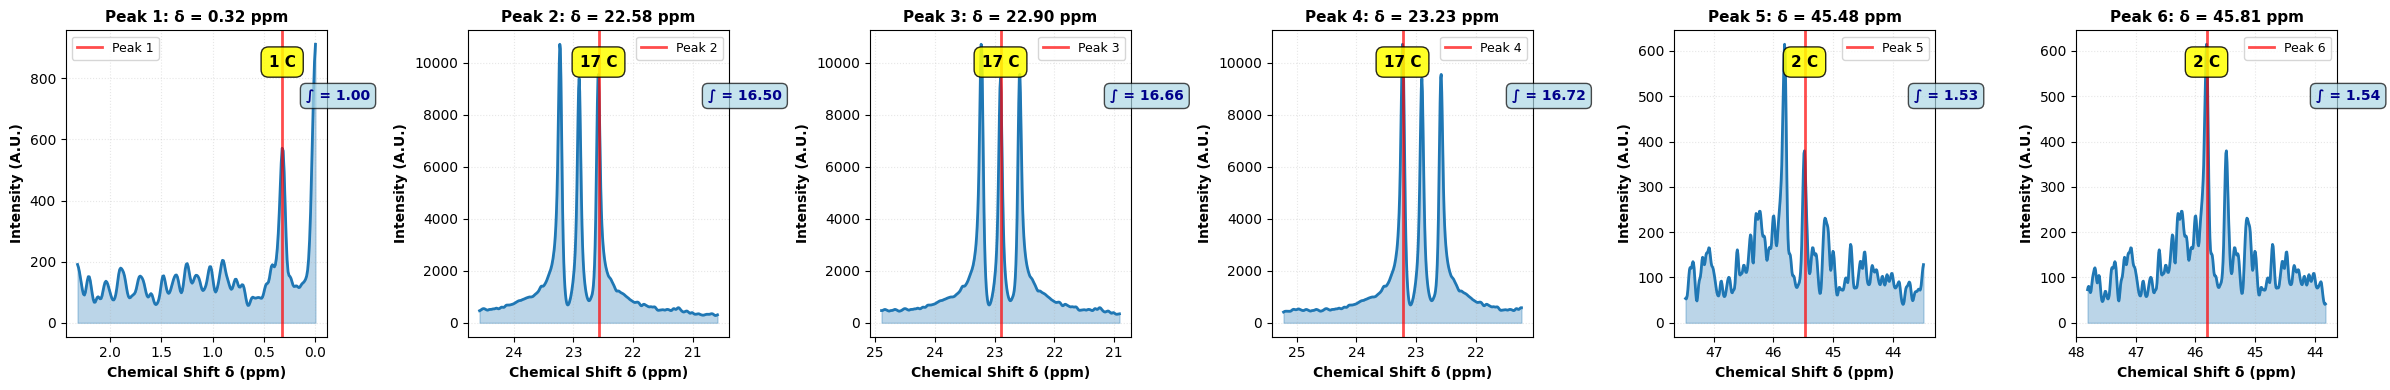


⚠️  Note: Carbon-13 integration is less reliable than ¹H-NMR due to:
   - Variable relaxation times (T1) for different carbon types
   - NOE effects in proton-decoupled spectra
   - Use primarily for qualitative comparison, not quantitative analysis


In [12]:
from scipy.integrate import simpson

# Integrate each peak and visualize
peak_data = []
integration_window_ppm = 2.0  # Window around each peak (±1 ppm)

if len(peaks) > 0:
    for i, peak_idx in enumerate(peaks):
        peak_ppm = ppm_axis_res[peak_idx]
        peak_height = intensity[peak_idx]
        
        # Define integration window
        left_ppm = peak_ppm - integration_window_ppm
        right_ppm = peak_ppm + integration_window_ppm
        
        # Find indices in window
        mask = (ppm_axis_res >= left_ppm) & (ppm_axis_res <= right_ppm)
        window_ppm = ppm_axis_res[mask]
        window_intensity = intensity[mask]
        
        # Integrate using Simpson's rule
        if len(window_intensity) > 2:
            integral = simpson(window_intensity, x=window_ppm)
        else:
            integral = np.trapz(window_intensity, x=window_ppm)
        
        peak_data.append({
            'peak_number': i + 1,
            'ppm': peak_ppm,
            'height': peak_height,
            'integral': abs(integral),
            'window_ppm': window_ppm,
            'window_intensity': window_intensity
        })
    
    # Normalize integrals to the smallest peak (for relative carbon counts)
    if peak_data:
        min_integral = min(p['integral'] for p in peak_data if p['integral'] > 0)
        for p in peak_data:
            p['relative_integral'] = p['integral'] / min_integral if min_integral > 0 else 0
            p['relative_integral_int'] = int(round(p['relative_integral']))
    
    # Display integration results with visualization
    print("\nPeak Integration Results:")
    print("=" * 90)
    print(f"{'Peak':<6} {'δ (ppm)':<10} {'Height (A.U.)':<15} {'Integral':<12} {'# Carbons':<12}")
    print("-" * 90)
    for p in peak_data:
        print(f"{p['peak_number']:<6} {p['ppm']:<10.2f} {p['height']:<15.1f} "
              f"{p['integral']:<12.2e} {p['relative_integral_int']:<12}")
    
    # Visualize integrations (style closer to H-NMR cell 42)
    print("\n📊 Visualizing Peak Integrations:")
    fig, axes = plt.subplots(1, len(peak_data), figsize=(4*len(peak_data), 4))
    if len(peak_data) == 1:
        axes = [axes]
    
    for idx, p in enumerate(peak_data):
        ax = axes[idx]
        num_carbons = p['relative_integral_int']
        
        # Plot spectrum in integration window
        ax.plot(p['window_ppm'], p['window_intensity'], linewidth=2, color='#1f77b4')
        ax.fill_between(p['window_ppm'], p['window_intensity'], alpha=0.3, color='#1f77b4')
        
        # Peak position marker
        ax.axvline(p['ppm'], color='red', linestyle='-', linewidth=2, alpha=0.7, label=f"Peak {p['peak_number']}")
        
        # Badge: number of carbons
        ax.text(p['ppm'], max(p['window_intensity']) * 0.92, f"{num_carbons} C", 
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', edgecolor='black', alpha=0.85))
        
        # Integration label
        ax.text(p['window_ppm'][0] + (p['window_ppm'][-1] - p['window_ppm'][0]) * 0.04, max(p['window_intensity']) * 0.80,
                f"∫ = {p['relative_integral']:.2f}", fontsize=10, fontweight='bold', color='darkblue',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', alpha=0.7))
        
        ax.invert_xaxis()
        ax.set_xlabel('Chemical Shift δ (ppm)', fontsize=10, fontweight='bold')
        ax.set_ylabel('Intensity (A.U.)', fontsize=10, fontweight='bold')
        ax.set_title(f"Peak {p['peak_number']}: δ = {p['ppm']:.2f} ppm", fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3, linestyle=':')
        ax.legend(fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\n⚠️  Note: Carbon-13 integration is less reliable than ¹H-NMR due to:")
    print("   - Variable relaxation times (T1) for different carbon types")
    print("   - NOE effects in proton-decoupled spectra")
    print("   - Use primarily for qualitative comparison, not quantitative analysis")
else:
    print("No peaks detected for integration")

# J-Coupling Analysis (Carbon-13)

**Important Note about Carbon-13 J-Coupling:**

In **proton-decoupled Carbon-13 NMR** (most common):
- $^{13}C$-$^{1}H$ coupling is **removed** by broadband decoupling
- $^{13}C$-$^{13}C$ coupling is **not observed** (only ~0.01% chance of adjacent $^{13}C$ atoms)
- Result: Each unique carbon shows as a **single sharp peak** (singlet)

In **coupled Carbon-13 NMR** (less common):
- $^{13}C$-$^{1}H$ coupling is visible
- Can determine number of attached hydrogens (DEPT technique is better for this)
- Typical $^{1}J_{CH}$ values: 125-250 Hz

If your spectrum shows multiplets, it may be:
1. A coupled $^{13}C$ spectrum (not decoupled)
2. Satellite peaks from $^{13}C$-$^{13}C$ coupling in enriched samples
3. Incomplete decoupling

Let's check for any multiplet structure:

In [13]:
# Check for multiplet structure in each identified peak region
from scipy.ndimage import gaussian_filter1d

def detect_multiplet_c13(ppm_axis, intensity, center_ppm, window=0.5):
    """
    Detect potential multiplet structure in a Carbon-13 peak.
    
    Args:
        ppm_axis: PPM values
        intensity: Spectrum intensity
        center_ppm: Center of peak to analyze
        window: Window size in ppm (±window around center)
    
    Returns:
        dict with multiplet information
    """
    # Mask for the region of interest
    mask = (ppm_axis > center_ppm - window) & (ppm_axis < center_ppm + window)
    region_ppm = ppm_axis[mask]
    region_intensity = intensity[mask]
    
    if len(region_intensity) < 10:
        return None
    
    # Smooth to reduce noise
    smoothed = gaussian_filter1d(region_intensity, sigma=2)
    
    # Find sub-peaks
    sub_peaks, props = find_peaks(
        smoothed,
        height=0.2 * max(smoothed),
        prominence=0.1 * max(smoothed),
        distance=5
    )
    
    if len(sub_peaks) <= 1:
        return {
            'type': 'singlet',
            'num_peaks': 1,
            'j_coupling': None,
            'center_ppm': center_ppm
        }
    
    # Calculate J-coupling from peak separations
    sub_ppms = region_ppm[sub_peaks]
    sub_ppms_sorted = np.sort(sub_ppms)
    
    # Convert ppm differences to Hz
    j_couplings_hz = []
    for i in range(len(sub_ppms_sorted) - 1):
        delta_ppm = sub_ppms_sorted[i+1] - sub_ppms_sorted[i]
        delta_hz = delta_ppm * C13_SPECTROMETER_FREQ
        j_couplings_hz.append(delta_hz)
    
    # Determine multiplet type
    n_peaks = len(sub_peaks)
    if n_peaks == 2:
        multiplet_type = 'doublet'
    elif n_peaks == 3:
        multiplet_type = 'triplet'
    elif n_peaks == 4:
        multiplet_type = 'quartet'
    else:
        multiplet_type = f'{n_peaks}-plet'
    
    return {
        'type': multiplet_type,
        'num_peaks': n_peaks,
        'j_coupling': np.mean(j_couplings_hz) if j_couplings_hz else None,
        'j_couplings_all': j_couplings_hz,
        'center_ppm': center_ppm,
        'sub_ppms': sub_ppms_sorted.tolist()
    }

# Analyze each identified peak
print("\\nMultiplet Analysis:")
print("=" * 80)

multiplet_results = []
has_coupling = False  # Track if we detect any multiplets

for i, peak_idx in enumerate(peaks):
    peak_ppm = ppm_axis_res[peak_idx]
    result = detect_multiplet_c13(ppm_axis_res, intensity, peak_ppm, window=0.5)
    
    if result:
        multiplet_results.append(result)
        print(f"\\nPeak {i+1} at δ {peak_ppm:.2f} ppm:")
        print(f"  Type: {result['type']}")
        
        if result['type'] != 'singlet':
            has_coupling = True
            print(f"  J-coupling: {result['j_coupling']:.2f} Hz")
            print(f"  Sub-peaks at: {[f'{p:.2f}' for p in result['sub_ppms']]} ppm")
            print(f"  ⚠️  Multiplet detected! This may indicate:")
            print(f"     - Coupled ¹³C spectrum (not fully decoupled)")
            print(f"     - ¹³C-¹H coupling visible")
            if result['j_coupling'] > 100:
                print(f"     - Likely ¹J(C-H) coupling (~{result['j_coupling']:.0f} Hz)")
        else:
            print(f"  Single peak (typical for decoupled ¹³C-NMR)")

# Determine if spectrum is coupled or decoupled
if has_coupling:
    print("\\n🔬 SPECTRUM APPEARS TO BE COUPLED")
    print("   Multiple sub-peaks detected, indicating ¹³C-¹H coupling is visible")
    print("\\n📚 About Coupled vs Decoupled Spectra:")
    print("   • Decoupled: Broadband proton decoupling removes ¹³C-¹H coupling → singlets")
    print("   • Coupled: No decoupling → multiplets reveal # of attached hydrogens")
    print("\\n🛠️  How to Decouple (Experimental):")
    print("   1. Apply broadband ¹H decoupling during acquisition (hardware)")
    print("   2. Use WALTZ-16 or GARP decoupling sequences")
    print("   3. Computational: Deep learning techniques can simulate decoupling")
    print("\\n💡 Visualizing Multiplet Patterns:")
else:
    print("\\n✅ SPECTRUM APPEARS TO BE DECOUPLED")
    print("   All peaks appear as singlets (expected for standard ¹³C-NMR)")
  

\nMultiplet Analysis:
\nPeak 1 at δ 0.32 ppm:
  Type: singlet
  Single peak (typical for decoupled ¹³C-NMR)
\nPeak 2 at δ 22.58 ppm:
  Type: doublet
  J-coupling: 32.59 Hz
  Sub-peaks at: ['22.58', '22.90'] ppm
  ⚠️  Multiplet detected! This may indicate:
     - Coupled ¹³C spectrum (not fully decoupled)
     - ¹³C-¹H coupling visible
\nPeak 3 at δ 22.90 ppm:
  Type: triplet
  J-coupling: 32.59 Hz
  Sub-peaks at: ['22.58', '22.90', '23.23'] ppm
  ⚠️  Multiplet detected! This may indicate:
     - Coupled ¹³C spectrum (not fully decoupled)
     - ¹³C-¹H coupling visible
\nPeak 4 at δ 23.23 ppm:
  Type: doublet
  J-coupling: 32.59 Hz
  Sub-peaks at: ['22.90', '23.23'] ppm
  ⚠️  Multiplet detected! This may indicate:
     - Coupled ¹³C spectrum (not fully decoupled)
     - ¹³C-¹H coupling visible
\nPeak 5 at δ 45.48 ppm:
  Type: triplet
  J-coupling: 34.50 Hz
  Sub-peaks at: ['45.13', '45.48', '45.81'] ppm
  ⚠️  Multiplet detected! This may indicate:
     - Coupled ¹³C spectrum (not fully 